# Lectura de Corpus Sentences

In [1]:
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
import multiprocessing
from time import time

class MyCorpus(object):
    def __iter__(self):
        for line in open('./Data/resumenes.txt'):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line.lower())

In [2]:
resumenes = MyCorpus()
# f = list(sentences)
# f[:3]

# Definicion de Modelo

In [77]:
def entrenamiento(sentences,epoches):
        
             
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
               window=3, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=cores, #En mi CPU
               sg=1, #Usamos el Modelo SkipGram
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=0, #Muestrea frecuencias por igual,
               alpha=0.025, #Tasa de aprendizaje
               min_alpha=0.0005, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
#                sample=5, #Reduccion para palabras con alta frecuencia
               iter=epoches, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )
        
        t = time()
        w2v.build_vocab(sentences, #Oraciones nuevas
               #update=True, #Agregar nuevo vocabulario
               progress_per=100000, #Palabras para procesar con antecipacion
               min_count=1
              ) # prepare the model vocabulary
        print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
        t = time()
        w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)
        print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        
        return w2v       

## MODELO 1

In [4]:
#Modelo V1 Entramiento con sentence = resumen
modelo1 = entrenamiento(resumenes)

Time to build vocab: 0.1 mins


<ipython-input-3-0900b0b4d401>:32: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)


Time to train the model: 9.55 mins


In [5]:
modelo1.save('Modelo_entrenado_pcgrias.model')

In [9]:
modelo1_cargado = Word2Vec.load('Modelo_entrenado_pcgrias.model')

In [10]:
modelo1_cargado

<strong>DATOS MODELO 1

Tiempo = 9 minutos, 55 segundos
Epocas = 500

## MODELO 2

In [78]:
modelo2 = entrenamiento(resumenes,250)

Time to build vocab: 0.07 mins


<ipython-input-77-839c126bc161>:32: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)


Time to train the model: 4.94 mins


In [79]:
modelo2.save('Modelo2_entrenado_pcgrias.model')

In [80]:
modelo2_cargado = Word2Vec.load('Modelo2_entrenado_pcgrias.model')

In [81]:
modelo2_cargado

<strong>DATOS MODELO 2
Tiempo = 4 mins,94 
Epocas = 250


## MODELO 3

In [91]:
modelo3 = entrenamiento(resumenes,50)

Time to build vocab: 0.07 mins


<ipython-input-77-839c126bc161>:32: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)


Time to train the model: 1.05 mins


In [92]:
modelo3.save('Modelo3_entrenado_pcgrias.model')

In [93]:
modelo3_cargado = Word2Vec.load('Modelo3_entrenado_pcgrias.model')

In [94]:
modelo3_cargado

<strong> DATOS MODELO 3 Tiempo = 1 min,05
    Epocas = 50

### SIMILARIDAD

In [96]:
modelo2_cargado.wv.similarity("mateo", "restrepo")

0.97516745

In [98]:
modelo3_cargado.wv.doesnt_match(["mateo","restrepo","social"])

/home/grias/anaconda3/envs/tg/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'social'

In [97]:
modelo3_cargado.wv.most_similar(positive=['nariño'], topn=20)

[('universidad', 0.6650943756103516),
 ('departamento', 0.601483166217804),
 ('nci', 0.5863863229751587),
 ('institute', 0.5772607326507568),
 ('prevé', 0.5595366954803467),
 ('acumulado', 0.5557448863983154),
 ('lascano', 0.5469204783439636),
 ('vasta', 0.5454751253128052),
 ('pictóricas', 0.5446751117706299),
 ('orientadores', 0.5432899594306946),
 ('desligado', 0.5401239395141602),
 ('resumen', 0.5384817123413086),
 ('planificada', 0.5361874103546143),
 ('chocó', 0.5351455211639404),
 ('caracterizaran', 0.5350091457366943),
 ('gesic', 0.533930242061615),
 ('torobajo', 0.5334230661392212),
 ('beneficiar', 0.5327647924423218),
 ('freire', 0.5313118696212769),
 ('islas', 0.5309543013572693)]

## VISUALIZACIÓN

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    counter=0
    for word in model.wv.vocab:
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        counter= counter+1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-32-c04bc18e4ee9>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


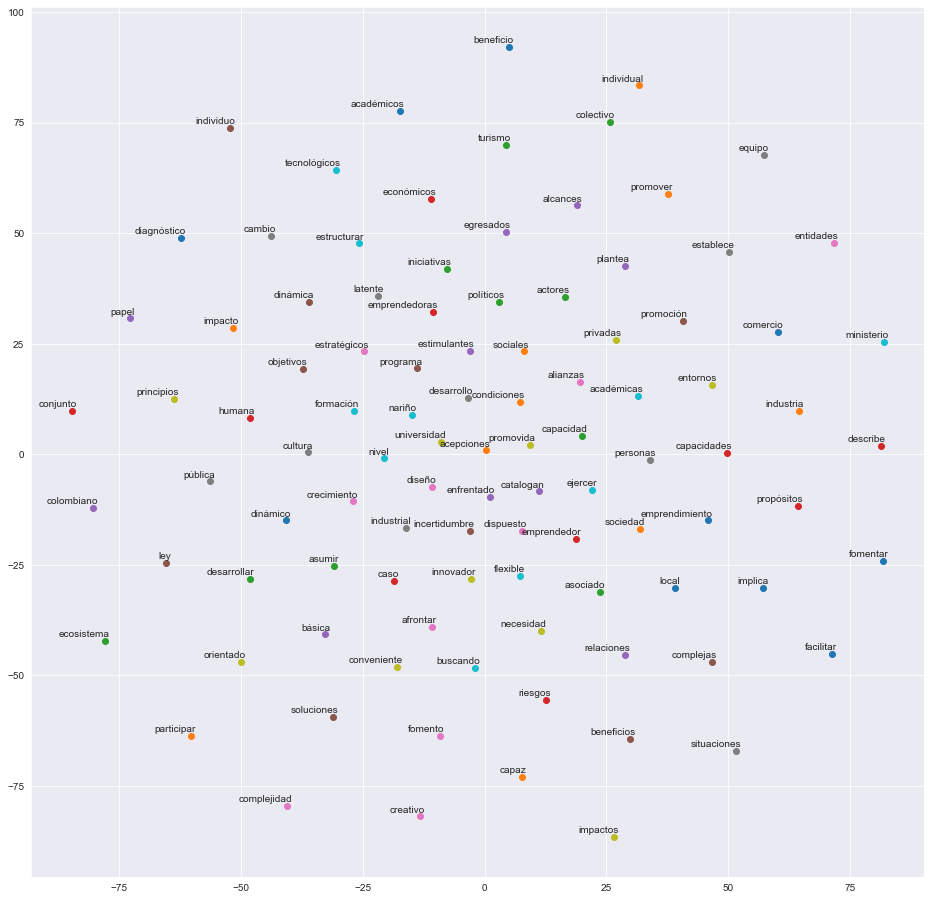

In [33]:
tsne_plot(modelo1_cargado)

In [ ]:
# w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
#                window=3, #Contexto, distancia entre palabras predichas
#                min_count=1, #Minimo de palabras a buscar
#                workers=4, #En mi CPU
#                sg=1, #Usamos el Modelo SkipGram
#                hs=0, #Cero para negative sampling, castigo a neurona
#                negative=20, #Palabras irrelevantes para el muestreo negativo
#                ns_exponent=0, #Muestrea frecuencias por igual,
#                alpha=0.025, #Tasa de aprendizaje
#                min_alpha=0.0005, #Tasa que se reducira durante el train
#                seed=25, #Semilla generar hash para palabras
#                max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
#                sample=5, #Reduccion para palabras con alta frecuencia
#                iter=150, #Epocas, valores altos sobreentreno )?
#                compute_loss=True #Muestra valor de perdida en el train
#               )

In [ ]:
# w2v.build_vocab(corpus_file='./Data/resumenes.txt')

In [ ]:
#Vocabulario con Diccionario de freq
###### w2v.build_vocab_from_freq(dictionary_resumenes)
#Voacabulario con letras
#w2v.build_vocab(setences, #Oraciones nuevas
#                corpus_file=path #txt
#                update=True, #Agregar nuevo vocabulario
#                progress_per=100000 #Palabras para procesar con antecipacion
#                 min_count=1
#               )


In [ ]:
# w2v.train(sentences, total_examples=w2v.corpus_count, report_delay=3)